# Exercise 2 mettere matricola/mail
## Group members:
* Antonio Feltrin, antonio.feltrin@studenti.unipd.it, ID 2097126
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

#### Import all dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd
import gzip

#### Generation of data

In [2]:
# type of encoding
one_hot = True

# sigmoid takes into account energy difference =2
SPINS = False
# type of gradient: Adam or Vanilla SGD
ADAM = True

# centering trick
centering = False
# Data
data = "b" # else "c"
# If we want energy (computationally demanding)
Iwant_energy = True

In [3]:
# random seed for reproducibility
np.random.seed(12346)

# size of dataset
N = 10000
# number of block for one-hot encoding
G = 5
# number of categories
A = 4
# number of categories of kind 0
A0 = int(A/2)
# number of categories of kind 1
A1 = A-A0
#
AA = [A0, A1]
# size of each data point
L = G*A
#  
# Noise: probability q to change category
q = 0.1  # 0.1 then 
#
# a = 0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

if data == "b":
    for n in range(N):
        # kind of the first slot
        k = np.random.randint(0,2)
        # label
        y[n] = k
        i0=0
        for g in range(G):
            # normal choice
            i = np.random.randint(0, AA[k])
            j = i + i0 + k*A0
            if np.random.random()<q:
                # normal choice
                i = np.random.randint(0,A)
                j = i + i0
            
            if(n<2): 
                print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
            # one-hot encoding
            x[n][j] = 1
            i0= i0 + A
            k = 1 - k
                    
        if(n<3): print(x[n], y[n])

    print("...")    

elif data == "c":
    x = np.loadtxt('Data_c/x_RBM_q0.2.dat', delimiter=" ",dtype=int)

else:
    print("Select your data")

L=20, A=4, G=5
k=1, g=0, i0=0, i=0, j=2, AA[k]=2
k=0, g=1, i0=4, i=1, j=5, AA[k]=2
k=1, g=2, i0=8, i=0, j=10, AA[k]=2
k=0, g=3, i0=12, i=0, j=12, AA[k]=2
k=1, g=4, i0=16, i=0, j=16, AA[k]=2
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0] 1
k=1, g=0, i0=0, i=1, j=3, AA[k]=2
k=0, g=1, i0=4, i=1, j=5, AA[k]=2
k=1, g=2, i0=8, i=0, j=10, AA[k]=2
k=0, g=3, i0=12, i=1, j=13, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1] 1
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1] 1
...


In [4]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

nriga = df0.iloc[0,:] #df0[i] prints i-th column while df0.iloc[i] prints i-th row
nriga[6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
5,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
7,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
8,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
9,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0


0

In [5]:
# We name "v" for "visible" instead of using x
v = np.copy(x)
# store in v0, because later we will shuffle v
v0 = np.copy(v)

if SPINS:
    GAP = 2 # is given by setting Energy levels = +- 1 and from the Boltzmann distribution getting a sigmoid function with coefficient 2 at the exponent
    v = 2*v - 1
    vmin = -1
else:
    GAP = 1
    vmin = 0

# RBM, number of hidden units
M = 6 # if not one_hot else 6

# range of each initial weight
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L, M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
 [ 0.03644147  0.11050993  0.30163547  0.48889193  0.39505217 -0.50841975]
 [ 0.10786059  0.08978702  0.53065764  0.34768619 -0.78510675 -0.14584864]]
a = [-0.88361978 -0.45766925  0.13869612]
...


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


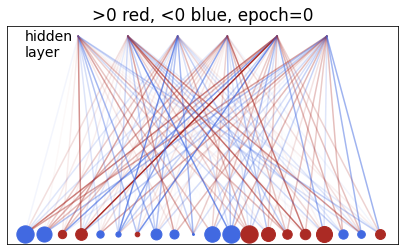

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(3*np-1) - 0.5) if np == 1 else f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return '#ab2a24'
    elif val<0: return 'royalblue'
    else: return 'black'
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=min(300, A*abs(a[i])), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [7]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):#? centering
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + np.exp(-DE*act))     # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0]
act= [ 0.49647937 -0.26311029  0.24287325 -0.25672648 -1.64634051 -0.88302266]
prob= [0.62163161 0.43459928 0.56042159 0.43616858 0.16160415 0.2925518 ]
output= [0 0 0 1 0 0]


array([0, 0, 0, 1, 0, 0])

## OUR METHODS

We use the method of fixing the one-hot encoding. We remind that, given the possibilities $[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]$, the energy of each group is given by $E = \sum_i a_i v_i + \sum_{i,\mu}W_{i\mu}v_ih_\mu$. (In theory there would also be the term $\sum_\mu b_\mu h_\mu$. However, since this term is the same for all of the possible encodings, we will neglect it when evaluating the probability of each encoding).

In [8]:
def one_hot_generator(nBlocks, w, h, a): #nBlocks = G
    encodings = [np.array([1,0,0,0]),np.array([0,1,0,0]),np.array([0,0,1,0]),np.array([0,0,0,1])]
    if SPINS:
        for i in range(len(encodings)):
            encodings[i] = 2*encodings[i] - np.ones(A, dtype=int)
    vf = np.zeros(L) #initialized as zeros
    for block in range(nBlocks):
        # try all encodings and choose one at random with probability given by maxwell boltzmann
        probabilities = []
        for encoding in encodings: #for each possible encoding 1000, 0100, ...
            energy = np.dot(a[block*4: (block+1)*4] + w[block*4:(block+1)*4, ]@h, encoding) #local field
            probabilities.append(np.exp(energy))    # ? *Gap ? sign
        probabilities = probabilities / sum(probabilities) #normalize    
        cumulatives = [sum(probabilities[:i+1]) for i in range(4)] 
        random = np.random.uniform(0., 1.)
        choice = 0#, picked = 0, False
        for i in range(4):
            if cumulatives[i] > random : #and picked == False:
                choice = i
                break #picked = True
        #Now choice is index of the encoding we want.
        vf[block*4:(block+1)*4] = encodings[choice]
    return vf

In [9]:
def one_hot_emanuele(nBlocks, w, v, b):
    encodings = np.eye(A, dtype=int)
    encodings[encodings == 0] = vmin
    local_field = v @ w + b
    energies = encodings @ (local_field.reshape(G, A).T)
    energies[energies > 4] = 4 # Upper and lower limit (is it worth it?)
    energies[energies < 4] = -4
    Bs = np.exp(GAP*energies)
    probs = Bs/np.sum(Bs, axis = 0)
    cum_prob = np.cumsum(probs, axis = 0)
    rnd = np.random.rand(G)
    mask = np.argmax(cum_prob > rnd, axis=0)
    return encodings[mask, :].reshape(-1)

### ADAM class

In [10]:
class AdamOptim():
    def __init__(self, eta=1e-3, beta1=0.9, beta2=0.99, epsilon=1e-8):
        self.m_dw, self.v_dw = np.zeros((L, M)), np.zeros((L, M))
        self.m_da, self.v_da = np.zeros(L), np.zeros(L)
        self.m_db, self.v_db = np.zeros(M), np.zeros(M)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        
    def update(self, t, w, a, b, dw, da, db):
        ## dw, da, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db
        # *** biases of hidden units *** #
        self.m_da = self.beta1*self.m_da + (1-self.beta1)*da

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases of hidden units *** #
        self.v_da = self.beta2*self.v_da + (1-self.beta2)*(da**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db**2)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_da_corr = self.m_da/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_da_corr = self.v_da/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)


        ## update weights and biases
        w = w + self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        a = a + self.eta*(m_da_corr/(np.sqrt(v_da_corr)+self.epsilon))
        b = b + self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        # m_dw, m_da, m_db = self.m_dw, self.m_da, self.m_db
        return w, a, b #, self.m_dw, self.m_da, self.m_db

### Vanilla SGD

In [11]:
def vanilla(w, a, b, dw, da, db):
# basic step of vanilla gradient descent, from eq.(211)
    w = w + dw
    a = a + da
    b = b + db
    return w, a, b

### Energy via log likelihood

In [12]:
def energy_is(v, h, w, a, b):
    eng = - np.dot(a,v) - np.dot(b,h) - np.dot(v.T@w,h)
    return eng

def one_hot_generator2(input, A, G):
    encodings = [np.array([0,0,0,1]), np.array([0,0,1,0]), np.array([0,1,0,0]), np.array([1,0,0,0])]
    output = []
    for i in input:
        output.append(encodings[int(i)])
    output = np.array(output)
    output = output.reshape(A*G,)
    if SPINS:
        output = output*GAP + np.full(A*G,vmin) 
    return output

def log_likelihood(w, a, b, v, h):
    eng, Z, L = 0, 0, 0 # Z = sum_x 
    for i in range(N):
        eng += energy_is(v[i], h[i], w, a, b)
    eng /= v.shape[0] # N

    #num_config = (A**G)*(2**M)
    for i in range(int(A**G)): # A**G = 4**5 1024, 2*M
        vgen = np.base_repr(i, base=A).zfill(G)
        vgen = one_hot_generator2(vgen, A, G)
        for j in range(int(2**M)):
            hgen = np.base_repr(j, base=2).zfill(M) 
            hgen = np.array([int(x) for x in str(hgen)])
            if SPINS:
                hgen = hgen*GAP + np.full(M, vmin)
            #print(f"vtype = {vgen.dtype}, hgen.dtype = {hgen.dtype}")
            #print(f"vgen={vgen}")
            Z += np.exp(-energy_is(vgen, hgen, w, a, b))
            # print(Z)


    # # prova:
    # for i in range(N):
    #     single_energy = 0   # energy for each v[i]
    #     for j in range(N):
    #         single_energy += np.exp(-energy_is(v[i], h[j], w, a, b))
    #     eng += np.log(single_energy)
    # # eng /= v.shape[0]
    #     L += np.log(eng) - np.log(Z)     # single value log-likelihood -> since log, from product to sum
            

    L = - eng - np.log(Z) # now L is going to be minimized    
    return L

In [13]:
def E_AAI(v, h):
    # this function works properly only with [0, 1] representation
    v_copy = np.copy(v)
    h_copy = np.copy(h)
    if SPINS:
        v_copy = ((v_copy + 1)/2).astype(int)
        h_copy = ((h_copy + 1)/2).astype(int)
    # let's calculate A_S & A_T
    A_S, A_T = 0, 0
    # all_distances_TS, all_distances_ST, all_distances_SS, all_distances_TT = np.zeros((v.shape[0], v.shape[0])),np.zeros((v.shape[0], v.shape[0])), np.zeros((v.shape[0], v.shape[0])), np.zeros((v.shape[0], v.shape[0]))
    for i in range(v.shape[0]):
        distances_TS = np.sum((h_copy[i] ^ v_copy), axis=1)
        distances_ST = np.sum((v_copy[i] ^ h_copy), axis=1)
        distances_SS = np.sum((v_copy[i] ^ v_copy), axis=1)
        distances_TT = np.sum((h_copy[i] ^ h_copy), axis=1)
        # update of the diagonal element
        # In this way the diagonal elements are 0: we sum to the diagonal element +30 (+20 it's still ok) so that the diagonal elements are not spotted
        # This because there could be non diagonal elements for which the distance is zero.
        distances_SS[i] = 30
        distances_TT[i] = 30

        if np.min(distances_SS) < np.min(distances_ST):
            A_S += 1
        elif np.min(distances_SS) == np.min(distances_ST):
            A_S += 0.5
        else:
            A_S += 0
        
        if np.min(distances_TT) < np.min(distances_TS):
            A_T += 1
        elif np.min(distances_TT) == np.min(distances_TS):
            A_T += 0.5
        else:
            A_T += 0

    print("Calculating the adversarial accuracy indicator energy...")
    return A_S/v.shape[0], A_T/v.shape[0]

In [14]:
def E(v, v1):
    A_S, A_T = E_AAI(v, v1)
    return A_S, A_T, (A_S-0.5)**2+(A_T-0.5)**2

In [15]:
vtot = np.array([1,2,3]) #test
def lolp(vtt):
    a = (vtt*2)
    return a
print(f"lolp = {lolp(vtot)}, vtot = {vtot}")

dfvtot = pd.DataFrame(vtot*2)
vtot


lolp = [2 4 6], vtot = [1 2 3]


array([1, 2, 3])

### Our score

In [16]:
def our_score(v1):
    scores = 0 #fa +1 per ogni riga giusta

    #Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
    # col - riga

    dfscore = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

    nBlocks = int(L/4)

    for nRiga in range(N): 
        #Controlla se questa riga è con alternanza sinistra destra
        riga = dfscore.iloc[nRiga,:]
        positions = [] 
        positionsLettere = [] #scritti "destra" "sinistra"
        corretto = True
        for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
            doppio = 0
            blocchetto = riga[block*4:(block+1)*4]
            indice = 0
            for i in range(4):
                if blocchetto[block*4 + i] == 1:
                    indice = i
                    doppio += 1
            if doppio != 1:
                corretto = False
            if indice < 2:
                positions.append(0) # 0 --> sinistra
                positionsLettere.append("sinistra ")
            else:
                positions.append(1) # 1 --> destra
                positionsLettere.append("destra ")

        for indice in range(len(positions)-1): #per ogni 0 1 etc
            if positions[indice] == positions[indice+1]:
                corretto = False
        if corretto == True:
            scores += 1
        if corretto == False:
            # print(nRiga, " è sbagliata")
            # print(positionsLettere)
            pass
            
    # print("Score: ", scores/N)
    return  scores/N

### Entropy

In [17]:
def S(v, v1):
    idx1 = np.random.randint(v.shape[0], size=int(v.shape[0]/2))
    idx2 = np.random.randint(v1.shape[0], size=int(v1.shape[0]/2))
    v_1_new = np.concatenate((v[idx1, :], v1[idx2, :]))
    delta_entropy = len(gzip.compress(v))/len(gzip.compress(v_1_new)) -1 
    return delta_entropy

## RBM train


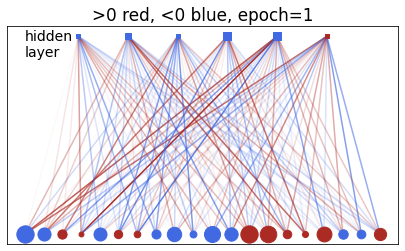

Calculating the adversarial accuracy indicator energy...
logl = -10.285947844904586, score = 0.0975
epoch =  0
epoch =  1
epoch =  2
epoch =  3
epoch =  4
epoch =  5
epoch =  6
epoch =  7
epoch =  8
epoch =  9


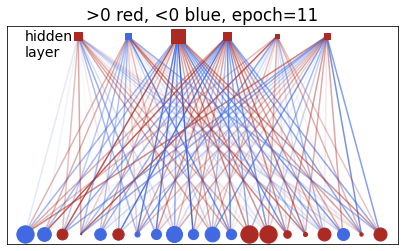

Calculating the adversarial accuracy indicator energy...
logl = -6.771466974128807, score = 0.7854
epoch =  10
epoch =  11
epoch =  12
epoch =  13
epoch =  14
epoch =  15
epoch =  16
epoch =  17
epoch =  18
epoch =  19


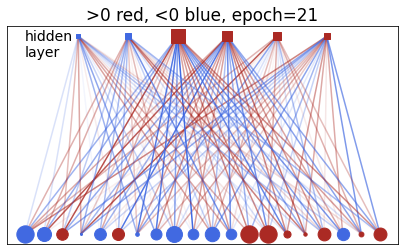

Calculating the adversarial accuracy indicator energy...
logl = -6.723514272574787, score = 0.7971
epoch =  20
epoch =  21
epoch =  22
epoch =  23
epoch =  24
epoch =  25
epoch =  26
epoch =  27
epoch =  28
epoch =  29


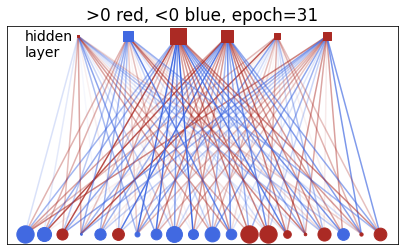

Calculating the adversarial accuracy indicator energy...
logl = -6.744334797100184, score = 0.7934
epoch =  30
epoch =  31
epoch =  32
epoch =  33
epoch =  34
epoch =  35
epoch =  36
epoch =  37
epoch =  38
epoch =  39


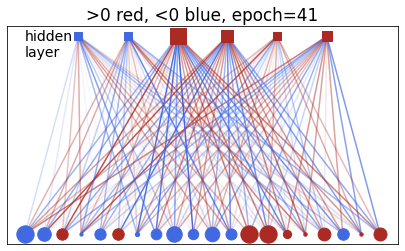

Calculating the adversarial accuracy indicator energy...
logl = -6.730581135015037, score = 0.7978
epoch =  40
epoch =  41
epoch =  42
epoch =  43
epoch =  44
epoch =  45
epoch =  46
epoch =  47
epoch =  48
epoch =  49


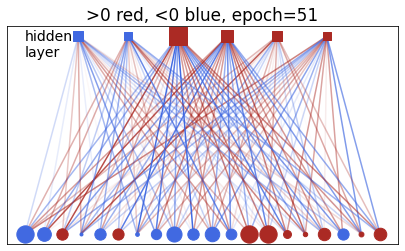

Calculating the adversarial accuracy indicator energy...
logl = -6.746287762399151, score = 0.7856
epoch =  50
epoch =  51
epoch =  52
epoch =  53
epoch =  54
epoch =  55
epoch =  56
epoch =  57
epoch =  58
epoch =  59


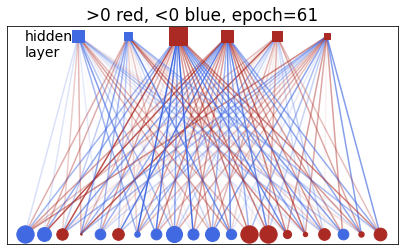

Calculating the adversarial accuracy indicator energy...
logl = -6.754787679381396, score = 0.7867
epoch =  60
epoch =  61
epoch =  62
epoch =  63
epoch =  64
epoch =  65
epoch =  66
epoch =  67
epoch =  68
epoch =  69


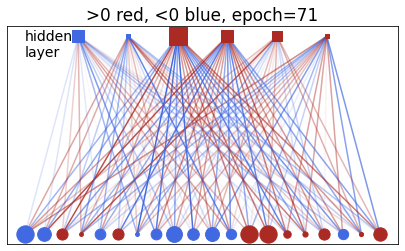

Calculating the adversarial accuracy indicator energy...
logl = -6.753017005292256, score = 0.7924
epoch =  70
epoch =  71
epoch =  72
epoch =  73
epoch =  74
epoch =  75
epoch =  76
epoch =  77
epoch =  78
epoch =  79


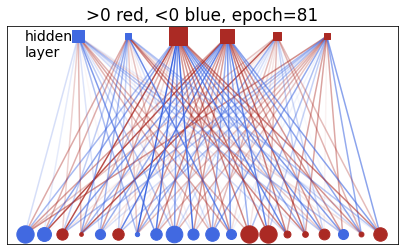

Calculating the adversarial accuracy indicator energy...
logl = -6.797023583930632, score = 0.7817
epoch =  80
epoch =  81
epoch =  82
epoch =  83
epoch =  84
epoch =  85
epoch =  86
epoch =  87
epoch =  88
epoch =  89


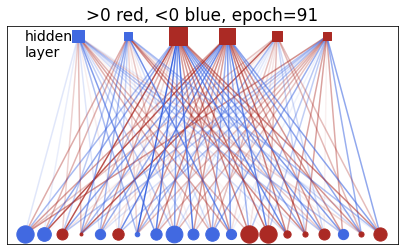

Calculating the adversarial accuracy indicator energy...
logl = -6.7617658683904684, score = 0.7913
epoch =  90
epoch =  91
epoch =  92
epoch =  93
epoch =  94
epoch =  95
epoch =  96
epoch =  97
epoch =  98
epoch =  99


In [18]:
# random seed for reproducibility
randseed = 12345
np.random.seed(randseed)

#plotgraph(0)

# learning rate for SGD
l_rate = 0.8

# One-hot encoding
nBlocks = int(L/4)

# minibatch
mini, m = 16, 0 #16>2

# Adam definition
adam = AdamOptim()

# CD-n iterations
n = 1

# Time for Adam
t = 1 

#rate, for calculating stuff
printrate = 10

# Number of epochs
epochs = 100

# Centering trick parameters
zed_a, zed_b = 0.01, 0.01

# energy & entropy sampling
A_S, A_T, energy, entropy = [], [], [], []
score, log_res = [], []

# train model
print('===================================================')
for epoch in range(epochs):
    mu_c, lambda_c= np.full(L, 0.25), np.full(M, 0.25) # μ, λ in centering
    # aggregate normalization of batch statistics and learning rate
    t = 1 #resets to avoid ADAM "flattening"
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
            if centering:
                vdat_c, vmod_c, hdat_c, hmod_c = np.zeros((mini, L)), np.zeros((mini, L)), np.zeros((mini, M)), np.zeros((mini, M))
        # positive CD phase: generating h # CD-1 here, so only one iteration
        h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        h0 = np.copy(h)
        # negative CD phase: generating fantasy vf
        for _ in range(n):
            # negative CD phase: generating fantasy vf
            vf = one_hot_generator(nBlocks, w, h, a) if one_hot else activate(h, w.T, a, GAP)  # fantasy unit
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf, w, b, GAP)
            h = np.copy(hf) 

        
        v_data  += v[k]
        v_model += vf
        h_data  += h0   # h
        h_model += hf
        if not centering:
            vh_data += np.outer(v[k].T,h0)  # h
            vh_model+= np.outer(vf.T,hf)
    
        # centering trick
        if centering:
            vdat_c[m] = v[k]
            vmod_c[m] = vf
            hdat_c[m] = h0
            hmod_c[m] = hf
    
        m += 1
        # minibatch
        if m==mini:

            if centering:
                # Centering Trick
                lambda_batch = h_data/mini
                mu_batch = v_data/mini
                # Bortoletto uses hi*wij*vj so the opposite of our indexing
                a = a + zed_b*np.dot(w, (lambda_batch - lambda_c))
                b = b + zed_a*np.dot(w.T, (mu_batch - mu_c))

                mu_c = (1 - zed_a)*mu_c + zed_a*mu_batch
                lambda_c = (1 - zed_b)*lambda_c + zed_b*lambda_batch

                for l in range(mini):
                    vh_data += np.outer((vdat_c[l] - mu_c),(hdat_c[l] - lambda_c).T)
                    vh_model += np.outer((vmod_c[l] - mu_c),(hmod_c[l] - lambda_c).T)

            # gradient of the likelihood: follow it along its positive direction
            # Adam update:
            #if epoch == 3:
            #    print(f"vh_data shape = {vh_data.shape}")
            dw = (vh_data - vh_model)/mini  # gradient variable
            da = (v_data - v_model)/mini    # gradient variable
            db = (h_data - h_model)/mini    # gradient variable
            # Adam update:
            w, a, b = adam.update(t, w, a, b, dw, da, db) if ADAM else vanilla(w, a, b, dw*l_rate, da*l_rate, db*l_rate)
            l_rate = l_rate / (0.05 * l_rate + 1) # if not ADAM
            m=0
            t+=1

    if epoch%printrate==0:
        plotgraph(epoch+1)
        
    #if epoch%2 == 0:
        # calculation for each epoch
        # original, non-reshuffled data in v0
        v1 = np.zeros_like(v0)
        hfin = np.zeros((N, M))
        for k in range(N):
            # positive CD phase: generating h 
            hfin[k] = activate(v0[k],w,b,GAP)  #? doesnt take CD into account
            # negative CD phase: generating fantasy vf
            v1[k] = one_hot_generator(nBlocks, w, hfin[k], a) if one_hot else activate(hfin[k],w.T,a,GAP)
        
        # energy
        if Iwant_energy:
            a1, a2, en = E(v0, v1)
            A_S.append(a1)
            A_T.append(a2)
            energy.append(en)

        # entropy
        entropy.append(S(v0, v1))

        # our score
        sco_temp = our_score(v1)
        score.append(sco_temp)
    
        # log likelihood
        log_temp = log_likelihood(w, a, b, v0, hfin)
        log_res.append(log_temp)

        print(f"logl = {log_temp}, score = {sco_temp}")

    # randomize the order of input data
    np.random.shuffle(v)
    
    print('epoch = ', epoch)

In [19]:
w[:3], a, b, dw[:3], da, db

(array([[-0.17351538,  0.66144058, -0.83948492,  0.77776318,  0.48968089,
          0.87230741],
        [-0.19058325,  0.65086185, -0.97710005,  1.3499187 ,  0.04940837,
          0.03384808],
        [ 0.34803447, -0.56960584,  1.39322927, -1.03821215,  0.21939594,
         -0.64838945]]),
 array([-0.73754641, -0.37496745,  0.25556674,  0.01477236, -0.21210098,
         0.26253182, -0.05872862, -0.24308496, -0.55392902, -0.24621454,
        -0.3696499 , -0.20071696,  0.61196874,  0.65905582,  0.11018469,
         0.07574195,  0.23546455, -0.20417302,  0.06118553,  0.34058553]),
 array([-0.23917634, -0.06937916,  0.7946829 ,  0.42563067,  0.22039565,
         0.08870219]),
 array([[ 0.    , -0.1875,  0.    , -0.1875, -0.1875, -0.1875],
        [ 0.0625,  0.1875,  0.    ,  0.1875,  0.125 ,  0.125 ],
        [-0.125 , -0.0625, -0.125 ,  0.    , -0.0625,  0.    ]]),
 array([-0.125 ,  0.1875, -0.125 ,  0.0625,  0.125 , -0.125 ,  0.    ,
         0.    ,  0.0625, -0.0625,  0.125 , -0.125 ,

In [20]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl = 40.
# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = one_hot_generator(nBlocks, w, h, a) if one_hot else activate(h,w.T,a,ampl*GAP)

def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df1.style.apply(
    lambda x: ['background-color: {}'.format("blue") for _ in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
5,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
7,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
8,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
9,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
6,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
7,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
8,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
9,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


In [21]:
# Programma che controlla se i dati sono giusti 

scores = 0 #fa +1 per ogni riga giusta

#Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
# col - riga

df0 = pd.DataFrame(v0[:N])
df1 = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

nBlocks = int(L/4)

for nRiga in range(N): 
    #Controlla se questa riga è con alternanza sinistra destra
    riga = df1.iloc[nRiga,:]
    positions = [] 
    positionsLettere = [] #scritti "destra" "sinistra"
    corretto = True
    for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
        doppio = 0
        blocchetto = riga[block*4:(block+1)*4]
        indice = 0
        for i in range(4):
            if blocchetto[block*4 + i] == 1:
                indice = i
                doppio += 1
        if doppio != 1:
            corretto = False
        if indice < 2:
            positions.append(0) # 0 --> sinistra
            positionsLettere.append("sinistra ")
        else:
            positions.append(1) # 1 --> destra
            positionsLettere.append("destra ")

    for indice in range(len(positions)-1): #per ogni 0 1 etc
        if positions[indice] == positions[indice+1]:
            corretto = False
    if corretto == True:
        scores += 1
    if corretto == False:
        print(nRiga, " è sbagliata")
        print(positionsLettere)
        
print("Score: ", scores/N)   

13  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
18  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
19  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
25  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
37  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'destra ']
60  è sbagliata
['sinistra ', 'destra ', 'destra ', 'sinistra ', 'sinistra ']
66  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
68  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
72  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
91  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
101  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
105  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
111  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']

In [22]:
# np.savetxt("energy.dat", energy,delimiter=" ",)
# np.savetxt("entropy.dat", entropy,delimiter=" ",)
# np.savetxt("score.dat", score,delimiter=" ",)

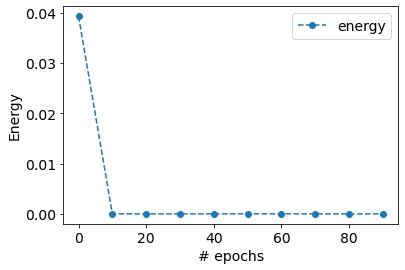

In [23]:
plt.plot(list(range(0, epochs, printrate)), energy, label="energy", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Energy")
plt.legend()
plt.show()

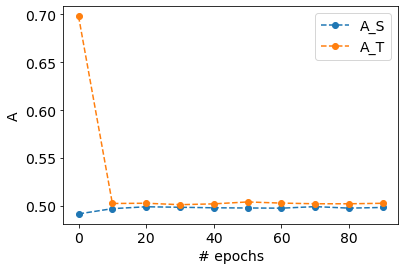

In [24]:
plt.plot(list(range(0, epochs, printrate)), A_S, label="A_S", ls="--", marker="o")
plt.plot(list(range(0, epochs, printrate)), A_T, label="A_T", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("A")
plt.legend()
plt.show()

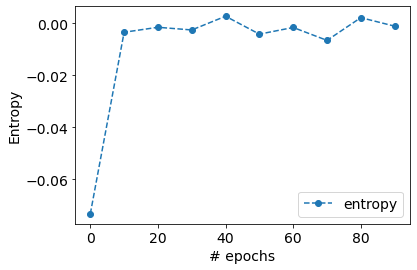

In [25]:
plt.plot(list(range(0, epochs, printrate)), entropy, label="entropy", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Entropy")
plt.legend()
plt.show()

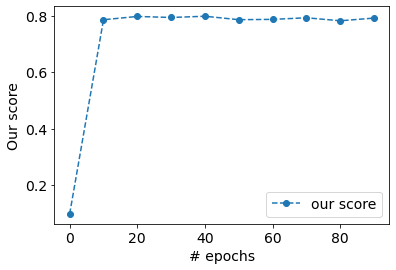

In [26]:
plt.plot(list(range(0, epochs, printrate)), score, label="our score", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Our score")
plt.legend()
plt.show()

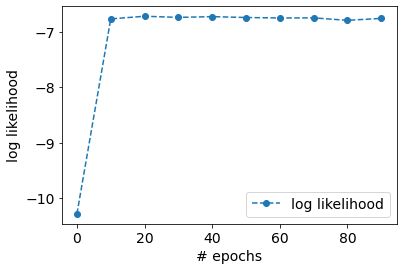

In [27]:
plt.plot(list(range(0, epochs, printrate)), log_res, label="log likelihood", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("log likelihood")
plt.legend()
plt.show()

In [28]:
df = pd.DataFrame(columns=["epochs", "energy", "A_S", "A_T", "score", "entropy", "log_likelihood"])
df["epochs"] = list(range(0, epochs, printrate))
df["energy"] = energy
df["A_S"] = A_S
df["A_T"] = A_T
df["score"] = score
df["entropy"] = entropy
df["log_likelihood"] = log_res

In [29]:
# df

In [30]:
! mkdir -p "My_data_results"
#randseed = 12345

In [31]:
dir_name = "My_data_results"
name = f"Adam_{n}" if ADAM else f"Vanilla_{n}"
name += "_one_hot" if one_hot else ""
name += "_CenteringTrick" if centering else "" 
name += "_Spin" if SPINS else "_NO-Spin" 
name += f"_{randseed}_"
file_name = dir_name+"/"+name+".dat"
np.savetxt(file_name, df, delimiter=" ", header="epochs, energy, A_S, A_T, score, entropy, log_likelihood", comments="")

In [32]:
print(f"{file_name} created!")

My_data_results/Adam_1_one_hot_NO-Spin_12345_.dat created!


In [33]:
# to see that everything had worked
read_result = pd.read_csv(file_name, delimiter=" ")
read_result

,"epochs,","energy,","A_S,","A_T,","score,","entropy,",log_likelihood
0,0.0,0.039313,0.49165,0.69810,0.0975,-0.073268,-10.285948
1,10.0,0.000015,0.49715,0.50255,0.7854,-0.003452,-6.771467
2,20.0,0.000009,0.49910,0.50280,0.7971,-0.001537,-6.723514
3,30.0,0.000004,0.49860,0.50130,0.7934,-0.002572,-6.744335
4,40.0,0.000008,0.49805,0.50215,0.7978,0.002702,-6.730581
5,50.0,0.000022,0.49785,0.50415,0.7856,-0.004178,-6.746288
6,60.0,0.000014,0.49765,0.50295,0.7867,-0.001614,-6.754788
7,70.0,0.000006,0.49925,0.50225,0.7924,-0.006577,-6.753017
8,80.0,0.000010,0.49770,0.50225,0.7817,0.002160,-6.797024
9,90.0,0.000010,0.49840,0.50275,0.7913,-0.001115,-6.761766


### Weights heatmap plot

In [34]:
#Functions from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs) #im now contains the data

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw) 
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

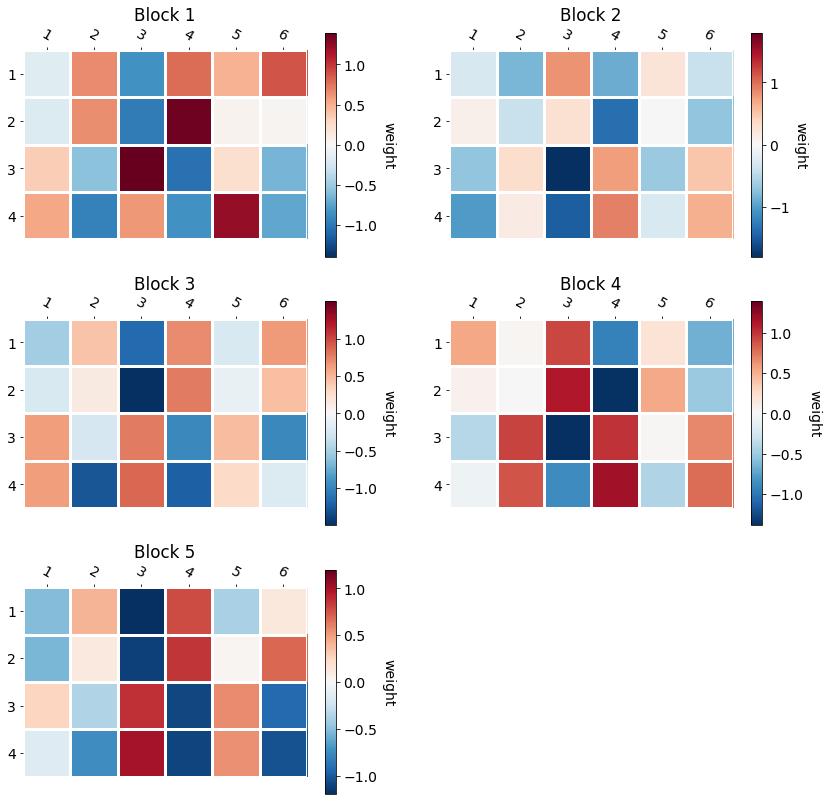

In [35]:
# 5 tabelle 4x6
#ATTENZIONE! Nella primissima cella (quella in cui importi numpy etc) aggiungere import matplotlib as mplt
def drawTables(w, nrows, ncols): #takes as input the weights
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (14,14))
    nBlocks = 5 #number of blocks
    for block in range(nBlocks): #verticale: blocco; orizzontale: unità immaginarie; colore: peso
        im, cbar = heatmap(w[block*4:(block+1)*4], np.arange(4)+1, np.arange(M)+1, ax = ax[block//2, block%2], cmap = "RdBu_r", cbarlabel = "weight", norm = mplt.colors.CenteredNorm())       
        ax[block//2, block%2].title.set_text("Block " + str(block+1))
    
    for axis in ax.flat[nBlocks:]:
        axis.remove()
    plt.show
    

drawTables(w,3,2)